<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Python-for-Remote-Sensing/blob/master/OSCAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install netcdf4
!apt-get -qq install python-cartopy python3-cartopy

In [0]:
import netCDF4 as nc
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [0]:
path = '/content/'
file = 'oscat_20190915_051038_scasa1_15718_o_500_2201_ovw_l2.nc'

data = nc.Dataset(path + file)

In [0]:
# print(data.variables['lat'])
# print(data.variables['lat'].scale_factor)
# print(data.variables['lat']._FillValue)
# a = np.array(data.variables['lat'])
# a[a == data.variables['lat']._FillValue] = np.nan
# # a = a * data.variables['lat'].scale_factor
# b = np.array(data.variables['lon'])
# b[b == data.variables['lon']._FillValue] = np.nan
# # b = b * data.variables['lon'].scale_factor

In [0]:
ascatWindSpeed1 = np.array(data.variables['wind_speed'])
ascatWindSpeed1[ascatWindSpeed1 == -32767] = np.nan
ascatWindDir1 = np.array(data.variables['wind_dir'])
ascatWindDir1[ascatWindDir1 == -32767] = np.nan
lat1 = np.array(data.variables['lat'])
# lat1[lat1 == -2147483647] = np.nan
lat1[lat1 == data.variables['lat']._FillValue] = np.nan
lon1 = np.array(data.variables['lon'])
lon1[lon1 == data.variables['lon']._FillValue] = np.nan

In [0]:
def wind_components(wSpeed, wDir, knots=False):
  '''
  Function to calculate u, v components of wind direction based
  on wind speed. It can also compute them in Knots.
  '''
  import numpy as np
  
  if knots:
    # obtain wind speed in Knots
    u = -wSpeed*np.sin(wDir * np.pi/180)*1.9438
    v = -wSpeed*np.cos(wDir * np.pi/180)*1.9438
  else:
    # wind speed is obtained in default (m/s^-1)
    u = -wSpeed*np.sin(wDir * np.pi/180)
    v = -wSpeed*np.cos(wDir * np.pi/180)

  return u, v

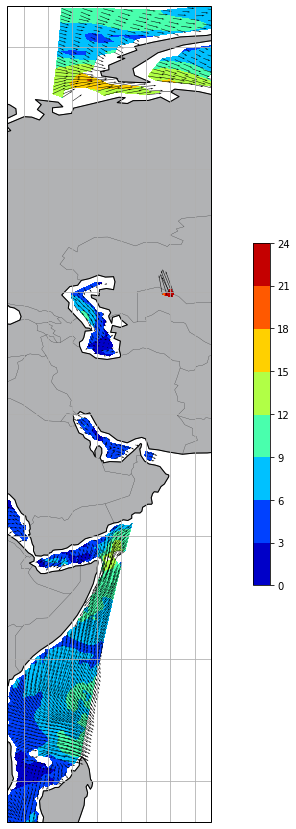

In [65]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

from matplotlib.ticker import MaxNLocator
levels = MaxNLocator(nbins=15).tick_values(ascatWindSpeed1.min(),
                                           ascatWindSpeed1.max())

# Draw Wind Speed Data
carto_map = ax.contourf(np.array(list(data.variables['lon'])),
                        np.array(list(data.variables['lat'])),
                        ascatWindSpeed1,
                        transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines(resolution='110m', linewidth=1, color='black')
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='#7f7f7f', 
               facecolor='#B1B2B4')

# country borders
ax.add_feature(cfeature.BORDERS, zorder=0, 
               edgecolor='#000000', linewidth=.2)
ax.gridlines()
fig.colorbar(carto_map, shrink=0.42)
ax.set_extent([40, 65, -20, 80])
# Draw wind speed vectors
dx = (-ascatWindSpeed1)*np.sin(ascatWindDir1 * np.pi / 180)  # u
dy = (-ascatWindSpeed1)*np.cos(ascatWindDir1 * np.pi / 180)  # v
q = ax.quiver(lon1, lat1, dx, dy, color="black", scale=200)
qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')

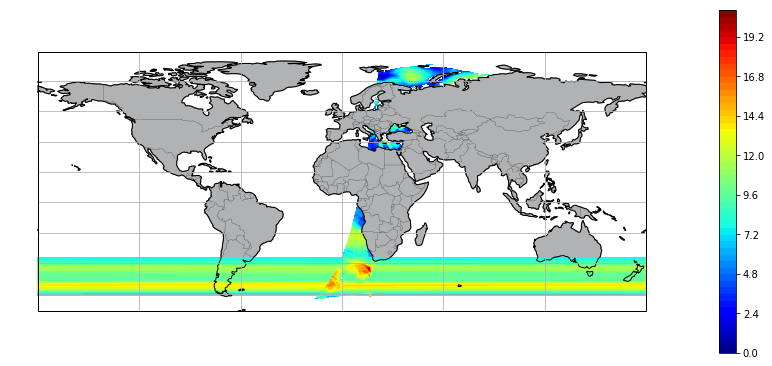

In [42]:
path = '/content/'
file = 'oscat_20190830_065053_scasa1_15487_o_500_2201_ovw_l2.nc'
data = nc.Dataset(path + file)

ascatWindSpeed1 = np.array(data.variables['wind_speed'])
ascatWindSpeed1[ascatWindSpeed1 == -32767] = np.nan
ascatWindDir1 = np.array(data.variables['wind_dir'])
ascatWindDir1[ascatWindDir1 == -32767] = np.nan
lat1 = np.array(data.variables['lat'])
lat1[lat1 == data.variables['lat']._FillValue] = np.nan
lon1 = np.array(data.variables['lon'])
lon1[lon1 == data.variables['lon']._FillValue] = np.nan

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

from matplotlib.ticker import MaxNLocator
levels = MaxNLocator(nbins=15).tick_values(ascatWindSpeed1.min(),
                                           ascatWindSpeed1.max())
# Draw Wind Speed Data
carto_map = ax.contourf(np.array(list(data.variables['lon'])),
                        np.array(list(data.variables['lat'])),
                        ascatWindSpeed1,
                        60, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines(resolution='110m', linewidth=1, color='black')
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='#7f7f7f', 
               facecolor='#B1B2B4')
# country borders
ax.add_feature(cfeature.BORDERS, zorder=0, 
               edgecolor='#000000', linewidth=.2)
ax.gridlines()
fig.colorbar(carto_map, shrink=0.42)

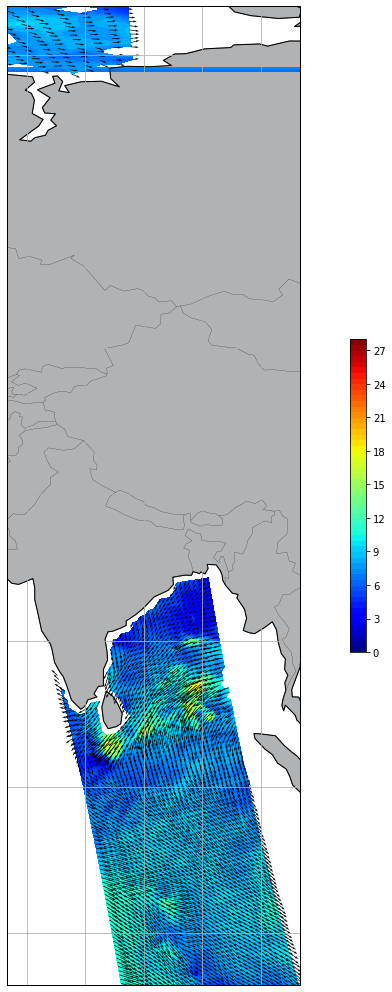

In [58]:
path = '/content/'
file = 'oscat_20190915_141647_scasa1_15724_o_500_2201_ovw_l2.nc'
data = nc.Dataset(path + file)

ascatWindSpeed1 = np.array(data.variables['wind_speed'])
ascatWindSpeed1[ascatWindSpeed1 == -32767] = np.nan
ascatWindDir1 = np.array(data.variables['wind_dir'])
ascatWindDir1[ascatWindDir1 == -32767] = np.nan
lat1 = np.array(data.variables['lat'])
lat1[lat1 == data.variables['lat']._FillValue] = np.nan
lon1 = np.array(data.variables['lon'])
lon1[lon1 == data.variables['lon']._FillValue] = np.nan

fig = plt.figure(figsize=(18, 18))
ax = plt.axes(projection=ccrs.PlateCarree())

from matplotlib.ticker import MaxNLocator
levels = MaxNLocator(nbins=15).tick_values(ascatWindSpeed1.min(),
                                           ascatWindSpeed1.max())
# Draw Wind Speed Data
carto_map = ax.contourf(np.array(list(data.variables['lon'])),
                        np.array(list(data.variables['lat'])),
                        ascatWindSpeed1,
                        60, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines(resolution='110m', linewidth=1, color='black')
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='#7f7f7f', 
               facecolor='#B1B2B4')
# country borders
ax.add_feature(cfeature.BORDERS, zorder=0, 
               edgecolor='#000000', linewidth=.2)
ax.gridlines()
fig.colorbar(carto_map, shrink=0.32)
ax.set_extent([70, 100, -20, 80])
# Draw wind speed vectors
dx = (-ascatWindSpeed1)*np.sin(ascatWindDir1 * np.pi / 180)  # u
dy = (-ascatWindSpeed1)*np.cos(ascatWindDir1 * np.pi / 180)  # v
q = ax.quiver(lon1, lat1, dx, dy, color="black", scale=270)
qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')